# Kaggle: House Prices - Advanced Regression Techniques

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn, xgboost, lightgbm, mlxtend, scipy
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

In [2]:
for library in [np, pd, sns, sklearn, scipy, xgboost, lightgbm, mlxtend]:
    print(library.__name__, library.__version__)

numpy 1.26.4
pandas 2.2.2
seaborn 0.13.2
sklearn 1.5.2
scipy 1.14.1
xgboost 2.1.3
lightgbm 4.5.0
mlxtend 0.23.4


## Exploratory Data Analysis + Feature Engineering

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can drop the Id column since it doesn't help us.

In [5]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

From this, we can see that there are 1460 observations and 81 features.

Features with noticeable amounts of nulls: `Alley`, `FireplaceQu`, `MasVnrType`, `PoolQC`, `Fence`, `MiscFeature`

In [7]:
train[['Alley', 'FireplaceQu', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']].describe()

,Alley,FireplaceQu,MasVnrType,PoolQC,Fence,MiscFeature
count,91,770,588,7,281,54
unique,2,5,3,3,4,4
top,Grvl,Gd,BrkFace,Gd,MnPrv,Shed
freq,50,380,445,3,157,49


Since Alley, PoolQC, Fence, and MiscFeature have too many nulls, we will drop these feature. Now let's take a look at the feature `FireplaceQu`

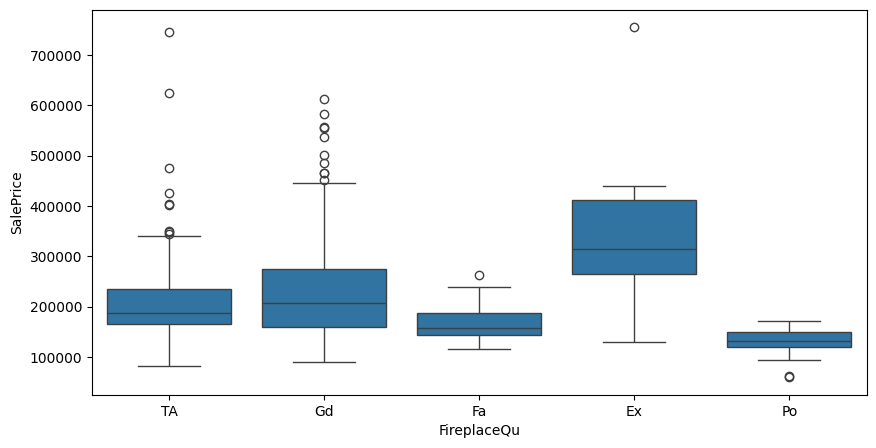

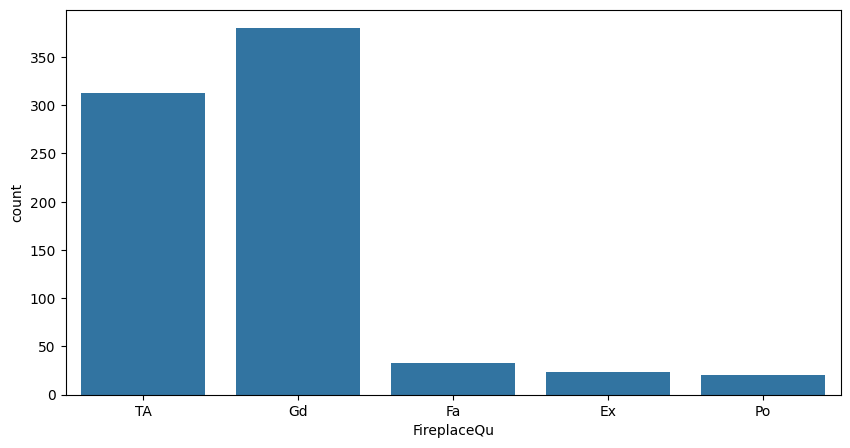

In [8]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = train['FireplaceQu'], y = train['SalePrice'])
plt.show()

plt.figure(figsize = (10, 5))
sns.countplot(x = train['FireplaceQu'])
plt.show()


This feature won't help us, since we already have a feature for the number of fireplaces, so we can drop it.

For `MasVnrType`, we can replace the nulls with 'None'

In [9]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [10]:
train = train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test = test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

### Correlations to SalePrice and Outliers

Rather than handpicking variables, we can look at the correlations between SalePrice and the rest of the features. This will help us decide if we need to drop any features.

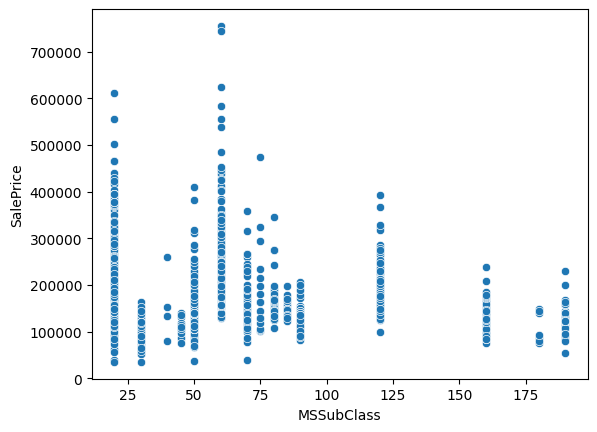

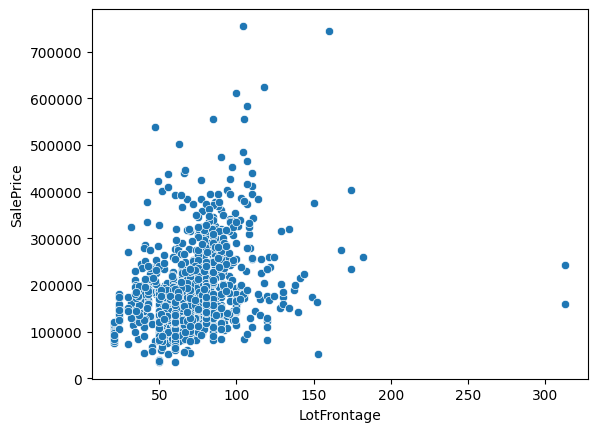

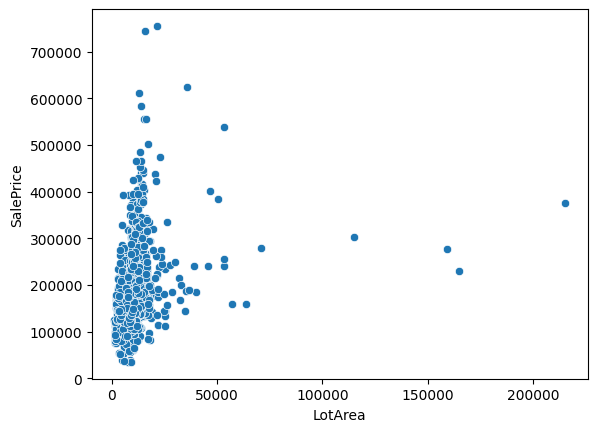

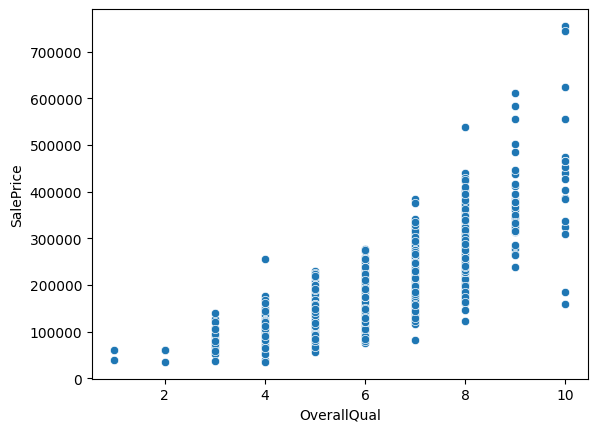

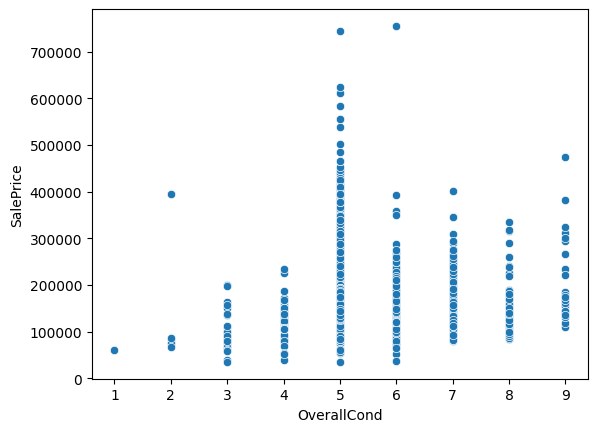

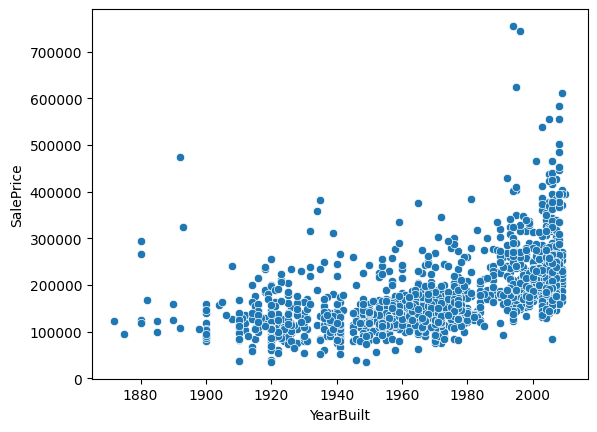

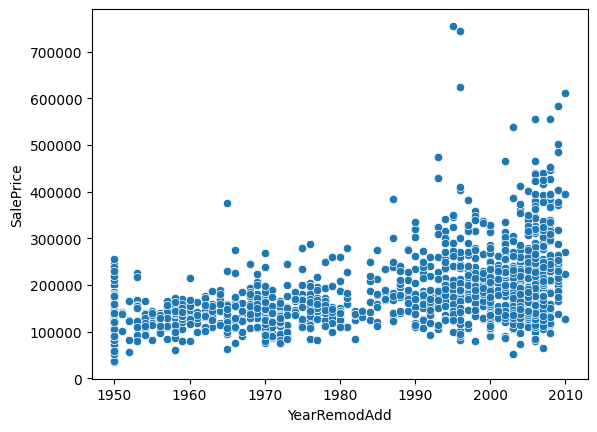

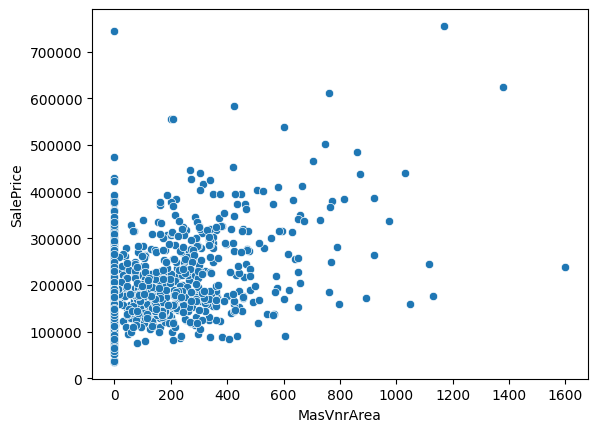

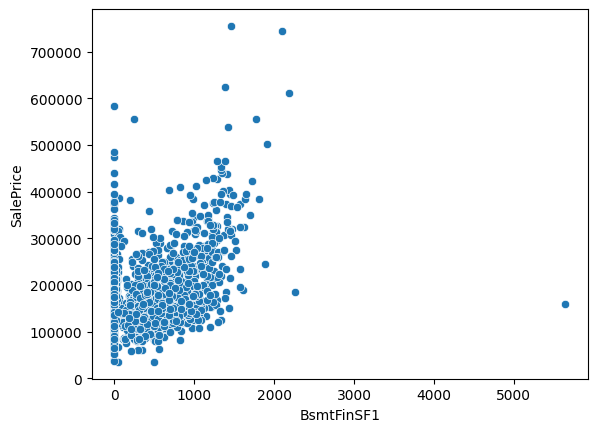

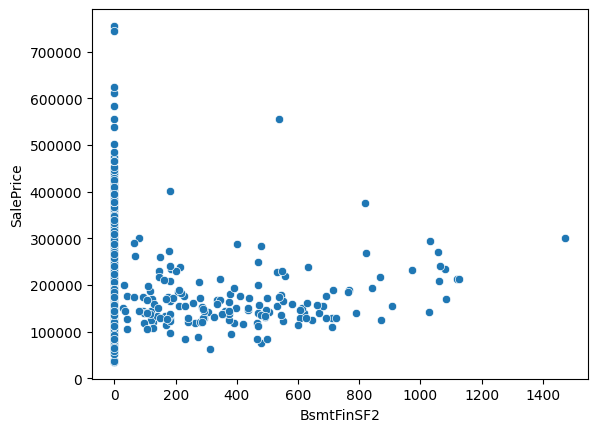

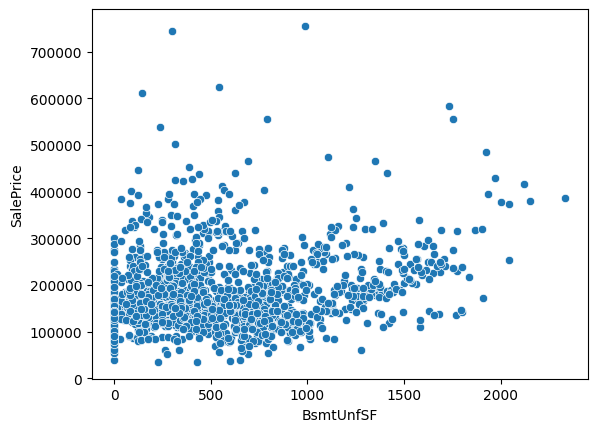

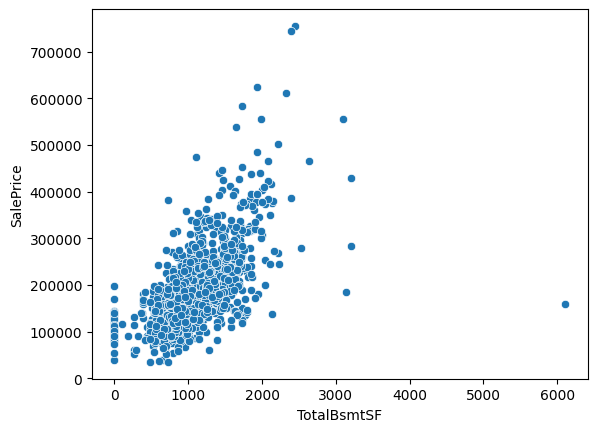

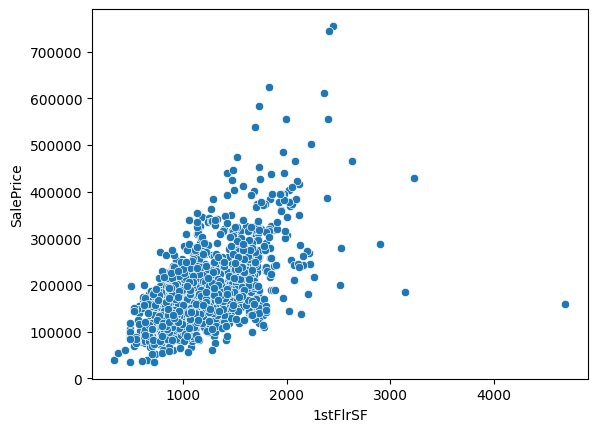

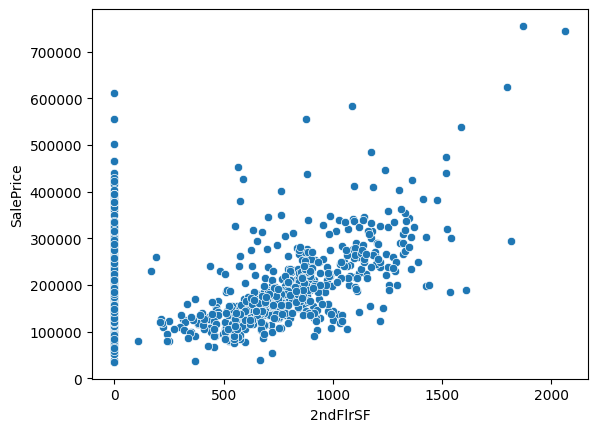

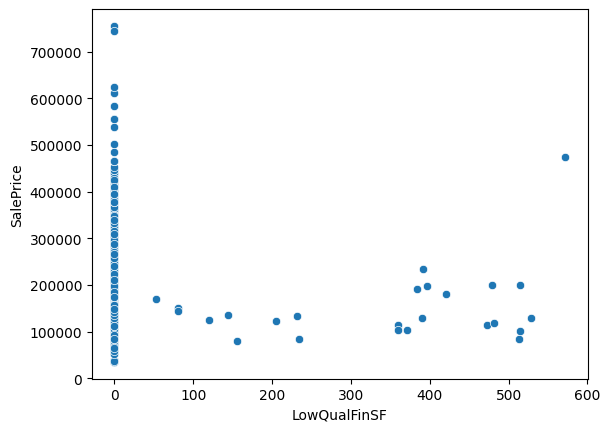

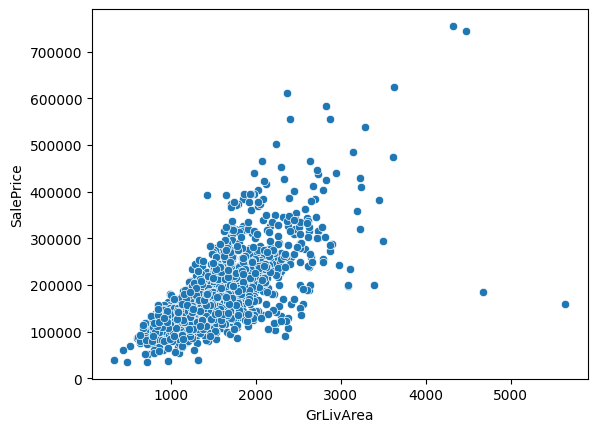

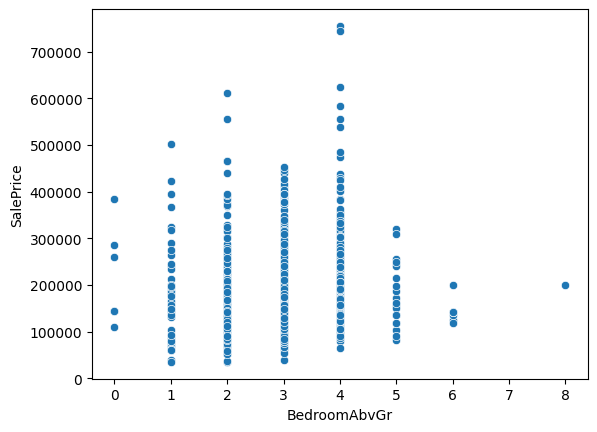

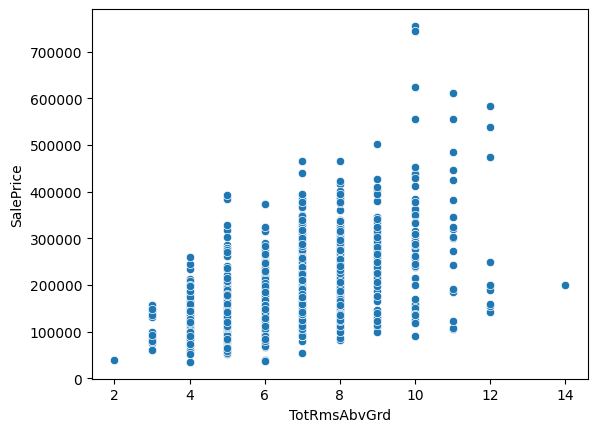

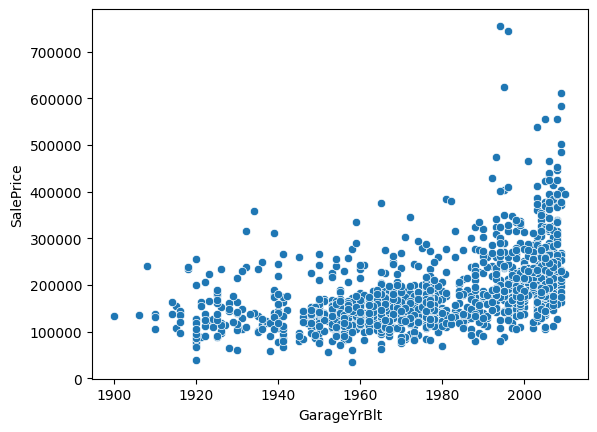

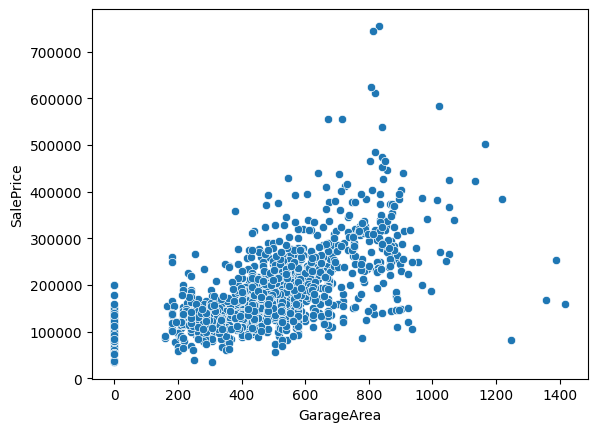

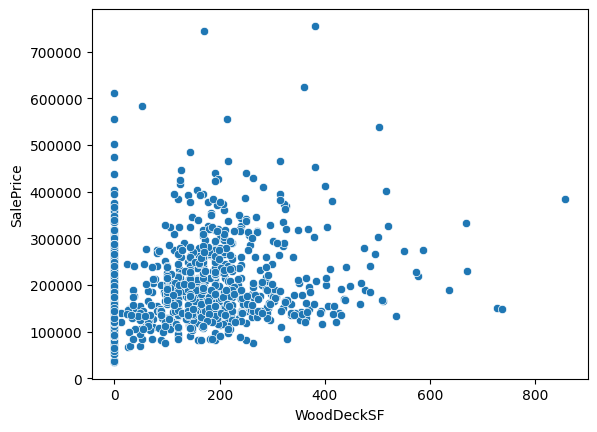

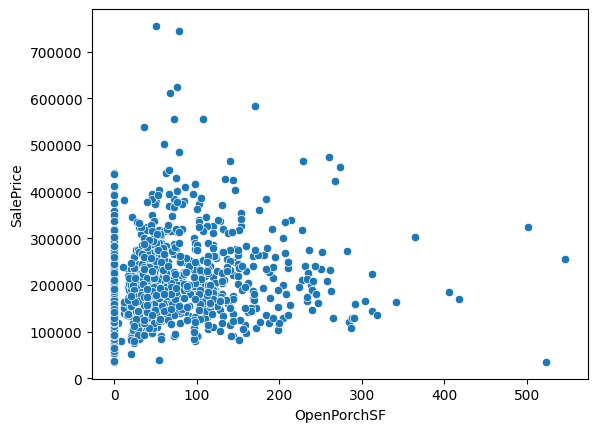

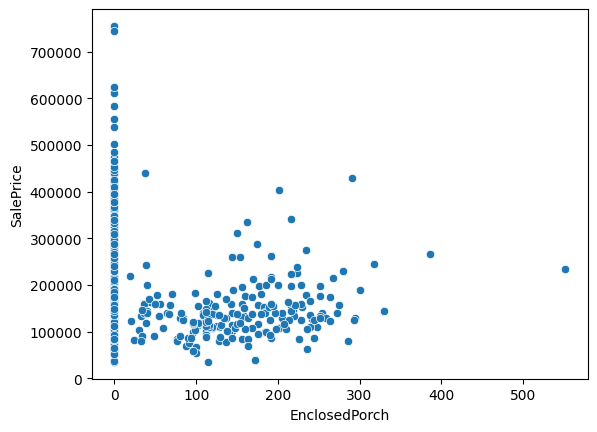

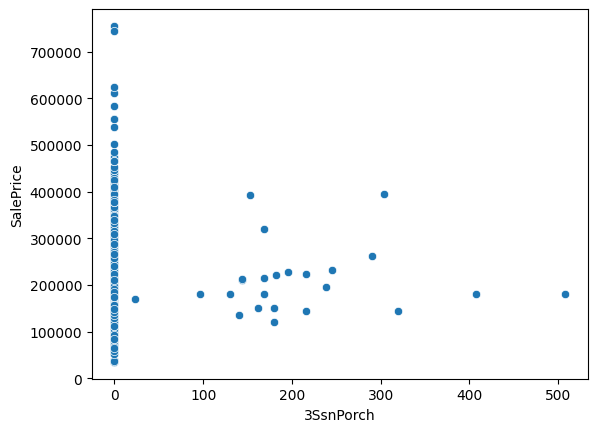

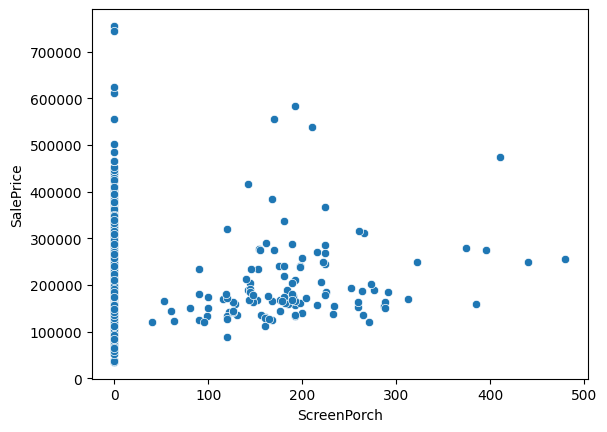

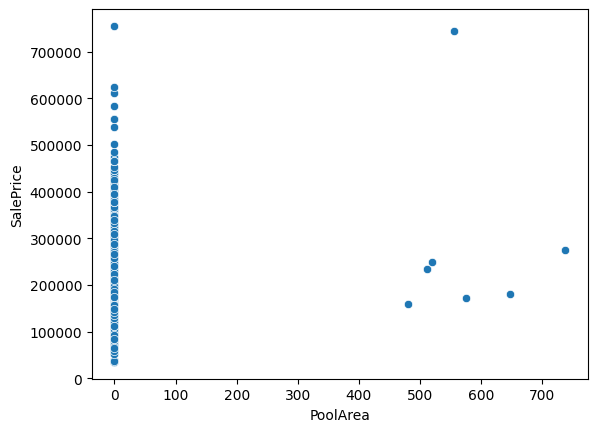

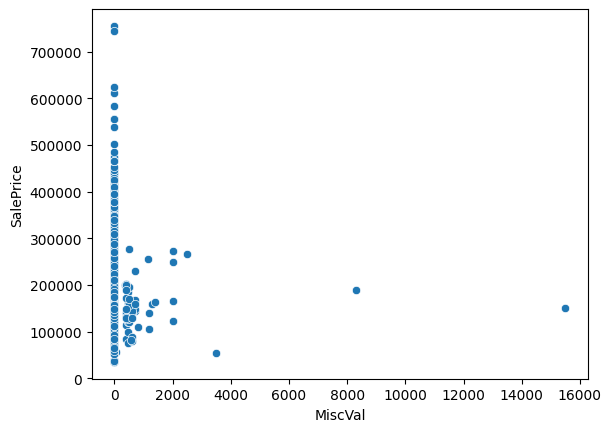

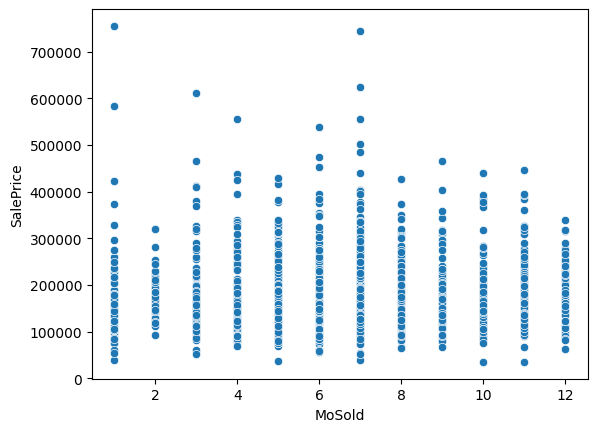

In [11]:
numerical_categories = train.select_dtypes(include = ['int64', 'float64'])
numerical_categories = numerical_categories.drop('SalePrice', axis=1)
numerical_categories = numerical_categories.columns[numerical_categories.nunique() > 5]

for i, col in enumerate(numerical_categories):
    plt.figure(i)
    sns.scatterplot(x = train[col], y = train['SalePrice'])
    plt.show()

Features that appear to have minimal correlation with SalePrice are: `LowQualFinSF`, `PoolArea`, `3SsnPorch`, and `MiscVal`.


In [12]:
train.drop(['LowQualFinSF', 'PoolArea', '3SsnPorch', 'MiscVal'], axis=1, inplace=True)
test.drop(['LowQualFinSF', 'PoolArea', '3SsnPorch', 'MiscVal'], axis=1, inplace=True)

There were also many outliers spotted in these graphs, let's get rid of them. I'm choosing to only rid the individual outliers and not groups, since these can help the model be more robust.

- LotFrontage
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- OpenPorchSF

In [13]:
train.sort_values(by = 'LotFrontage', ascending = False)['LotFrontage'].head()
train.drop(934, inplace=True)
train.drop(1298, inplace=True)

In [14]:
train.sort_values(by = 'MasVnrArea', ascending = False)['MasVnrArea'].head()
train.drop(297, inplace=True)

In [15]:
train.sort_values(by = 'BsmtFinSF1', ascending = False)['BsmtFinSF1'].head()
train.drop(523, inplace=True)

In [16]:
train.sort_values(by = 'BsmtFinSF2', ascending = False)['BsmtFinSF2'].head()
train.drop(332, inplace=True)

In [17]:
train.sort_values(by = 'TotalBsmtSF', ascending = False)['TotalBsmtSF'].head()
train.sort_values(by = '1stFlrSF', ascending = False)['1stFlrSF'].head()
train.sort_values(by = 'GrLivArea', ascending = False)['GrLivArea'].head()
#They both have the same index
train.drop(496, inplace=True)

In [18]:
train.sort_values(by = 'OpenPorchSF', ascending = False)['OpenPorchSF'].head()
train.drop(495, inplace=True)

## Nulls

For dealing with these values, we will combine the train and test sets into one dataframe.

In [19]:
combined = pd.concat([train, test], axis=0)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2912 entries, 0 to 1458
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2912 non-null   int64  
 1   MSZoning       2908 non-null   object 
 2   LotFrontage    2427 non-null   float64
 3   LotArea        2912 non-null   int64  
 4   Street         2912 non-null   object 
 5   LotShape       2912 non-null   object 
 6   LandContour    2912 non-null   object 
 7   Utilities      2910 non-null   object 
 8   LotConfig      2912 non-null   object 
 9   LandSlope      2912 non-null   object 
 10  Neighborhood   2912 non-null   object 
 11  Condition1     2912 non-null   object 
 12  Condition2     2912 non-null   object 
 13  BldgType       2912 non-null   object 
 14  HouseStyle     2912 non-null   object 
 15  OverallQual    2912 non-null   int64  
 16  OverallCond    2912 non-null   int64  
 17  YearBuilt      2912 non-null   int64  
 18  YearRemodAdd 

The features with null are:
`'MSZoning', 'Exterior1st', 'Exterior2nd', 'LotFrontage', 'Utilities', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional','GarageFinish', 'GarageType' 'GarageCars', 'GarageArea', 'GarageYrBlt', 'GarageCond', 'GarageQual', 'SaleType'`

The numerical nulls:
`'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'`

The categorical nulls:
`'MSZoning', 'Exterior1st', 'Exterior2nd', 'Utilities', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional','GarageFinish', 'GarageType', 'GarageCond', 'GarageQual', 'SaleType'`

First we will deal with the numerical nulls

### Numerical Nulls

Before this, let's see how many houses have garages and basements, since we can use this information to deal with the nulls

In [20]:
has_garage = combined['GarageType'].notnull().astype(int)

has_bsmt = combined['BsmtQual'].notnull().astype(int)

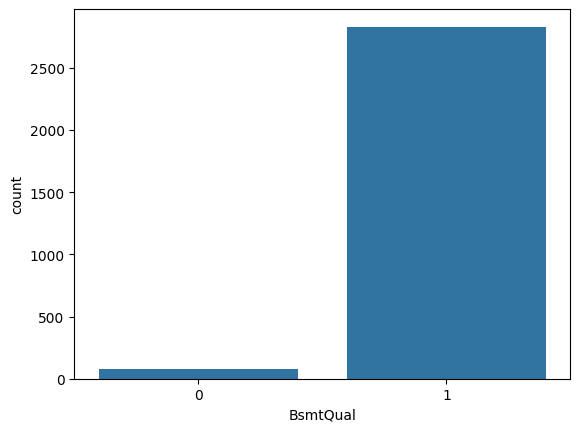

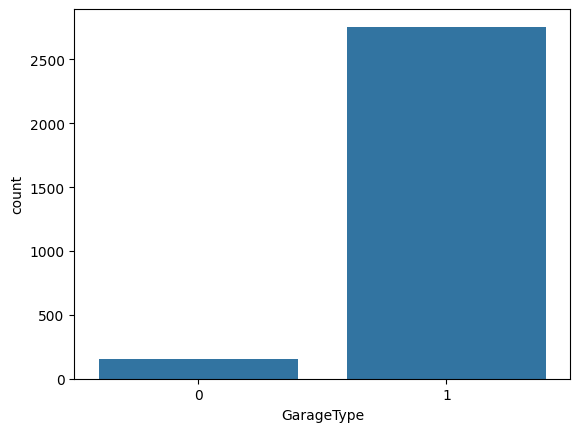

In [21]:
sns.countplot(x = has_bsmt)
plt.show()

sns.countplot(x = has_garage)
plt.show()

We can see that most houses have a garage and basement

In [22]:
combined[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
          'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 
          'GarageYrBlt', 'GarageCars', 'GarageArea']].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2427.000000,2889.000000,2911.000000,2911.000000,2911.000000,2911.000000,2910.000000,2910.000000,2754.000000,2911.00000,2911.000000
mean,69.078698,101.253375,438.421505,49.536929,560.187564,1048.145998,0.428866,0.061512,1978.077705,1.76606,472.359670
std,22.263467,176.407930,444.121050,169.206888,438.700034,425.612214,0.524011,0.245964,25.579228,0.76110,214.479764
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.00000,0.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.00000,320.000000
50%,68.000000,0.000000,368.000000,0.000000,467.000000,989.000000,0.000000,0.000000,1979.000000,2.00000,479.000000
75%,80.000000,164.000000,732.500000,0.000000,803.500000,1301.000000,1.000000,0.000000,2002.000000,2.00000,576.000000
max,200.000000,1378.000000,4010.000000,1526.000000,2336.000000,5095.000000,3.000000,2.000000,2207.000000,5.00000,1488.000000


We'll replace the MasVnrArea nulls with the mean of the other MasVnrArea values without 0's, only for the houses with a MasVnrType

In [23]:
masvnrarea_mean = combined.loc[combined['MasVnrType']!='None', 'MasVnrArea'].mean()
combined.fillna({'MasVnrArea': masvnrarea_mean}, inplace = True)

Garage and Basement features with null are likely to be houses without garages or basements, so we will fill them with 0's

In [24]:
combined.fillna({'GarageCars': 0, 'GarageArea': 0, 'BsmtFinSF1': 0, 'BsmtFinSF2': 0, 
                 'BsmtUnfSF': 0, 'TotalBsmtSF': 0,'BsmtFullBath': 0, 'BsmtHalfBath': 0,
                 'GarageYrBlt': 0}, inplace = True)

Lot Frontage has a large disparity between 75th percentile and max, meaning there are many outliers skewing, so we will fill with the median

In [25]:

combined.fillna({'LotFrontage': combined['LotFrontage'].median()}, inplace = True)

### Categorical Nulls

In [26]:
combined[['MSZoning', 'Exterior1st', 'Exterior2nd', 'Utilities', 'BsmtQual', 
          'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 'Electrical', 
          'KitchenQual', 'Functional','GarageFinish', 
            'GarageType', 'GarageCond', 'GarageQual', 'SaleType']].describe()

,MSZoning,Exterior1st,Exterior2nd,Utilities,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,GarageFinish,GarageType,GarageCond,GarageQual,SaleType
count,2908,2911,2911,2910,2831,2830,2830,2833,2833,2911,2911,2910,2754,2756,2754,2754,2911
unique,5,15,16,2,4,4,4,6,6,5,4,7,3,6,5,5,9
top,RL,VinylSd,VinylSd,AllPub,TA,TA,No,Unf,Unf,SBrkr,TA,Typ,Unf,Attchd,TA,TA,WD
freq,2260,1023,1012,2909,1282,2599,1900,851,2487,2665,1491,2710,1230,1719,2648,2598,2520


Utilities is almost all "AllPub", so we can drop it.

In [27]:
combined.drop(['Utilities'], axis=1, inplace=True)

We will fill MSZoning, Exterior1st, Exterior2nd, KitchenQual, Electrical, SaleType, and Functional with the mode

In [28]:
combined.fillna({'MSZoning': 'RL', 'Exterior1st': 'VinylSd', 'Exterior2nd': 'VinylSd', 
                 'KitchenQual': 'TA','Functional': 'Typ', 'SaleType': 'WD',
                 'Electrical': 'SBrkr'}, inplace = True)

All basement and garage features with null values are likely houses without garages or basements

In [29]:
combined.fillna({'BsmtQual': 'NA','BsmtCond': 'NA','BsmtExposure': 'NA','BsmtFinType1': 'NA', 
                 'BsmtFinType2': 'NA', 'GarageFinish': 'NA', 'GarageType': 'NA',
                 'GarageCond': 'NA', 'GarageQual': 'NA'}, inplace = True)

## Feature Importance and Correlation

Let's use a correlation matrix and XGBoost to find the most important features

In [30]:
temp = combined.copy()
categorical_cols = temp.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(list(temp[col].values))
    temp[col] = le.transform(list(temp[col].values))

temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,4,2,706.0,6,0.0,150.0,856.0,1,0,1,4,856,854,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,2,2008,8,4,208500.0
1,20,3,80.0,9600,1,3,3,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,4,1262,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,5,2007,8,4,181500.0
2,60,3,68.0,11250,1,0,3,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,1,4,920,866,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,9,2008,8,4,223500.0
3,70,3,60.0,9550,1,0,3,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,4,0,216.0,6,0.0,540.0,756.0,1,2,1,4,961,756,1717,1.0,0.0,1,0,3,1,2,7,6,1,5,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,0,3,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,4,1145,1053,2198,1.0,0.0,2,1,4,1,2,9,6,1,1,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,12,2008,8,4,250000.0


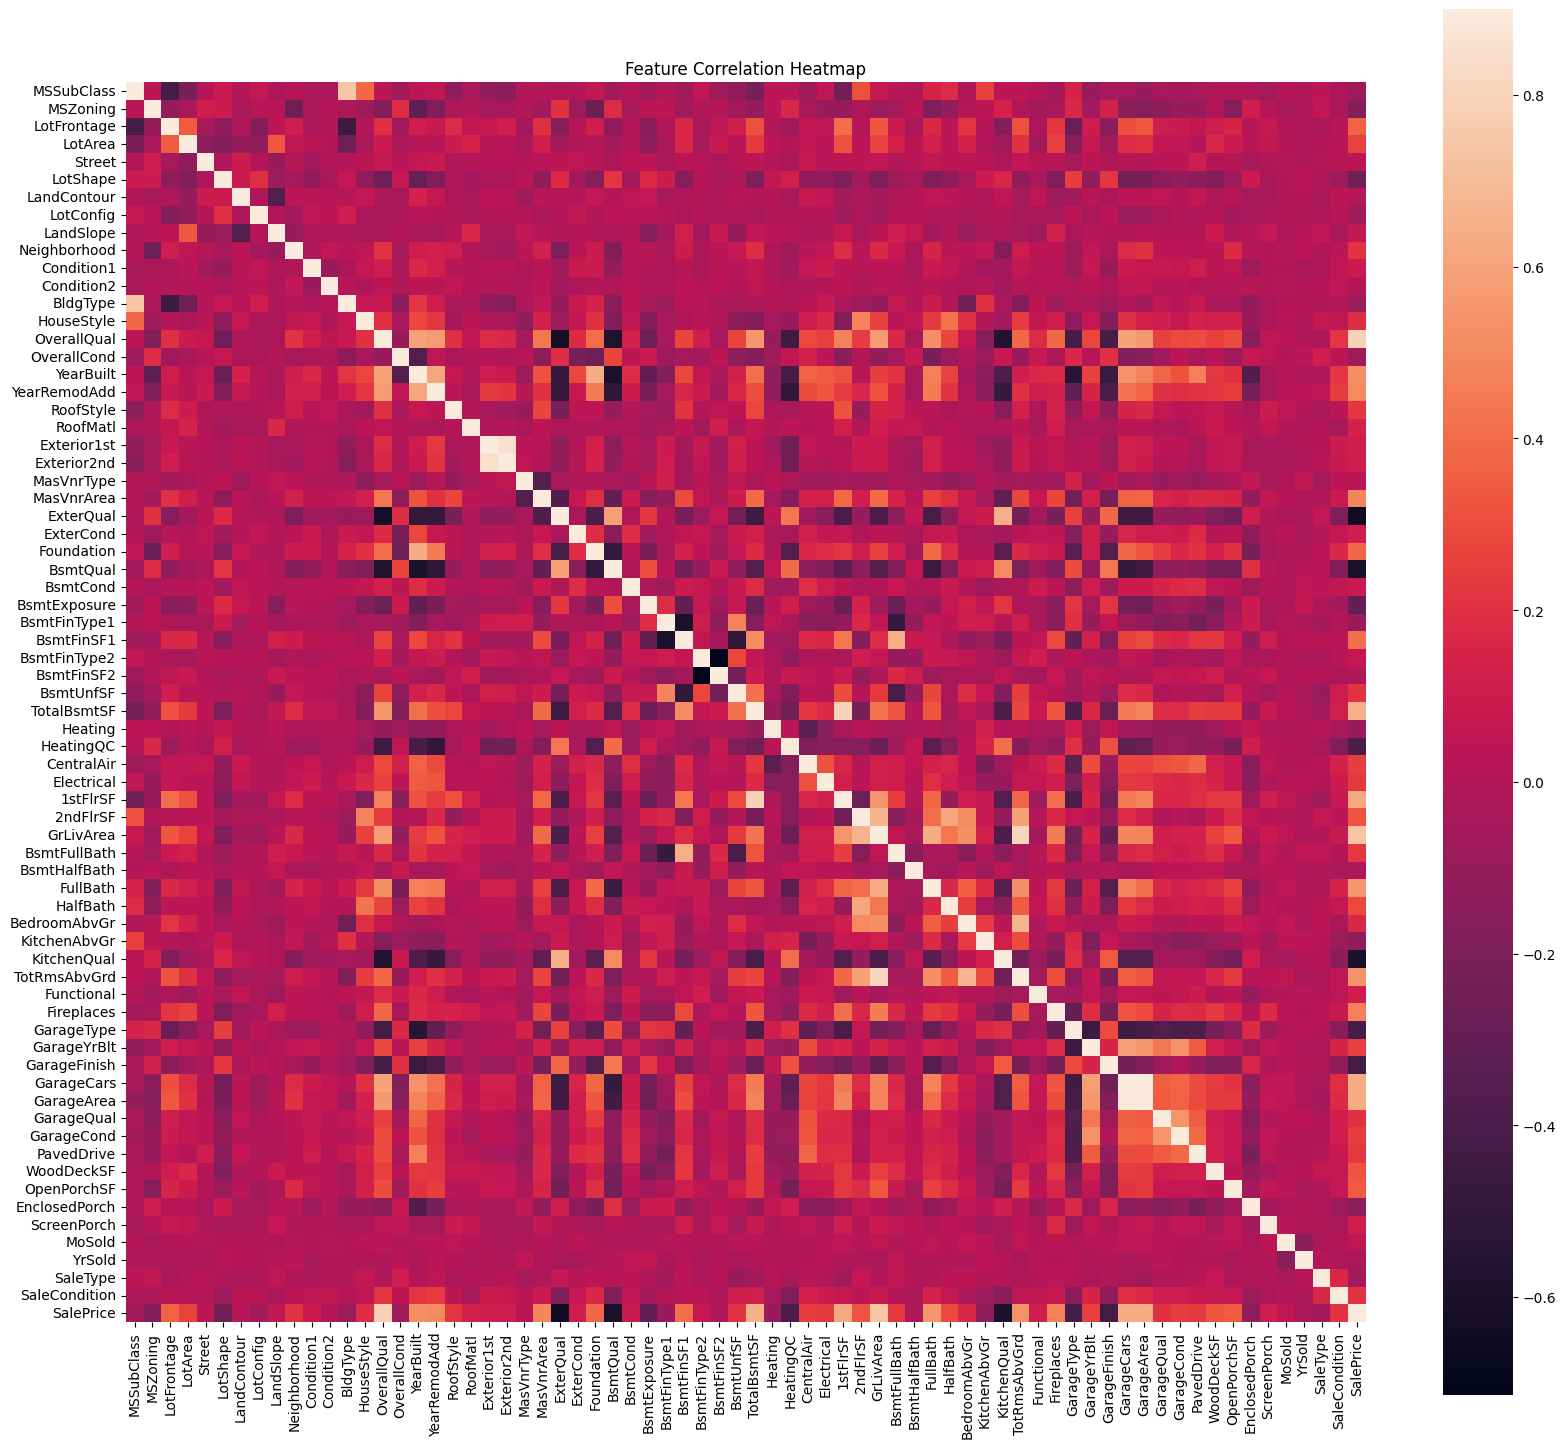

In [31]:
corr_matrix = temp.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,vmax=0.9, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Features that are highly correlated can be attributed to multilinearity. The attributes below have a correlation of > 0.7.

- Exterior1st and Exterior2nd
- 1stFlrSF and TotalBsmtSF
- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea
- GarageCars and GarageArea

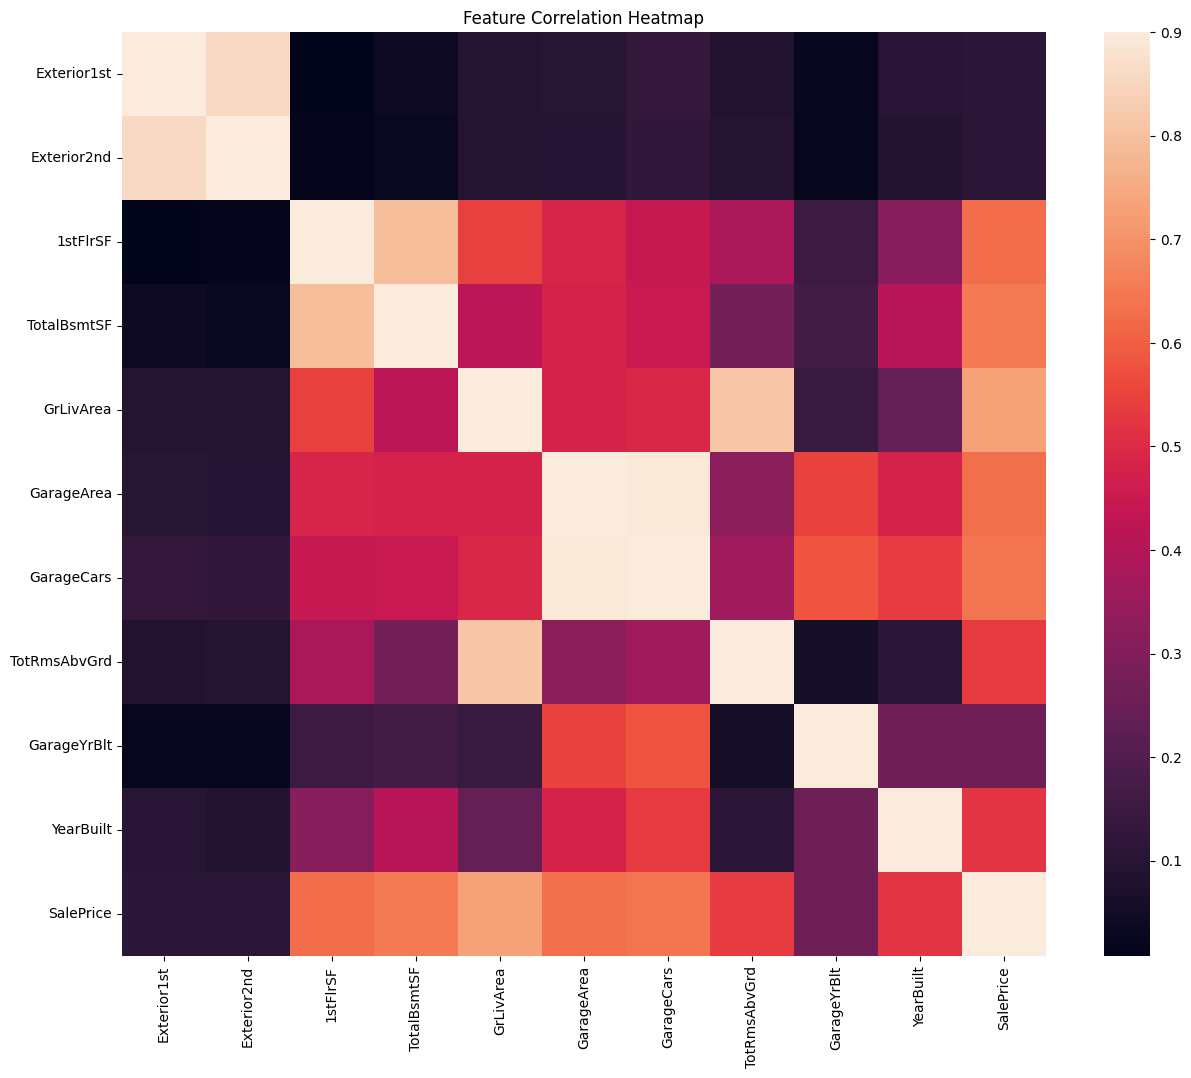

In [32]:
temp1 = temp[['Exterior1st', 'Exterior2nd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 
             'GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt', 'YearBuilt', 
             'SalePrice']]
corr_matrix = temp1.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, vmax=0.9, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

We will drop the features that are highly correlated and aren't unique to the domain:
- Exterior2nd

In [33]:
combined.drop(['Exterior2nd'], axis=1, inplace=True)

Now we will test for feature importance using XGBoost

In [34]:
temp = combined[:len(train)].copy()
categorical_cols = temp.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(list(temp[col].values))
    temp[col] = le.transform(list(temp[col].values))

xg = XGBRegressor(max_depth=5, n_estimators=1000, random_state=13, 
                  learning_rate=0.05, early_stopping_rounds=5)
X_temp = temp.drop(['SalePrice'], axis=1)
y_temp = temp['SalePrice']

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=13)

xg.fit(X_train_temp, y_train_temp, eval_set=[(X_test_temp, y_test_temp)], verbose=False)

importances = xg.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_temp.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.sort_values(by='Importance', ascending=False))

          Feature  Importance
14    OverallQual    0.364964
26       BsmtQual    0.095944
55     GarageCars    0.049684
41      GrLivArea    0.046955
39       1stFlrSF    0.037861
34    TotalBsmtSF    0.036424
40       2ndFlrSF    0.033613
49   TotRmsAbvGrd    0.028534
48    KitchenQual    0.026146
52     GarageType    0.025857
37     CentralAir    0.020023
30     BsmtFinSF1    0.018977
23      ExterQual    0.017953
47   KitchenAbvGr    0.016566
44       FullBath    0.011814
51     Fireplaces    0.011790
5        LotShape    0.010053
8       LandSlope    0.009321
56     GarageArea    0.008139
3         LotArea    0.006938
16      YearBuilt    0.006616
1        MSZoning    0.006505
66       SaleType    0.006461
28   BsmtExposure    0.006440
42   BsmtFullBath    0.006300
17   YearRemodAdd    0.005304
15    OverallCond    0.005202
9    Neighborhood    0.004913
29   BsmtFinType1    0.004856
45       HalfBath    0.004766
54   GarageFinish    0.004701
46   BedroomAbvGr    0.003250
53    Gara

Most features seem to be important, let's drop those around ~0.001 or less

In [35]:
combined.drop(['HeatingQC', 'EnclosedPorch', 'BsmtCond', 'RoofMatl', 'MSSubClass',
               'Electrical', 'Heating', 'ExterCond', 'Street'], axis=1, inplace=True)

## Encoding

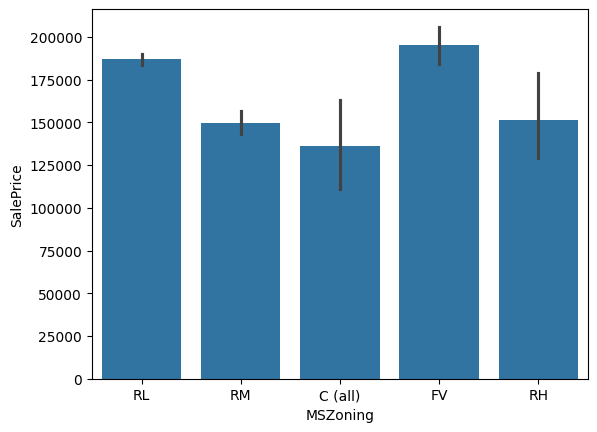

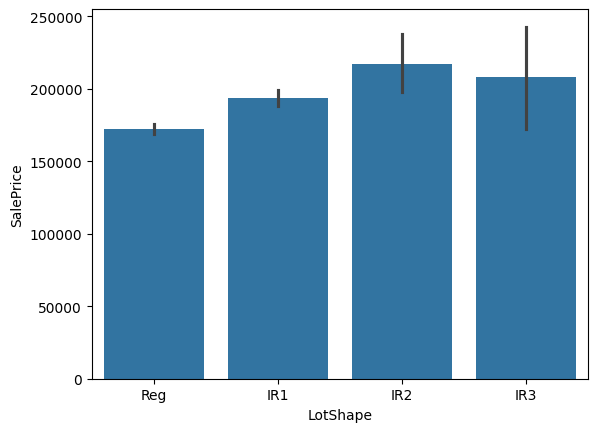

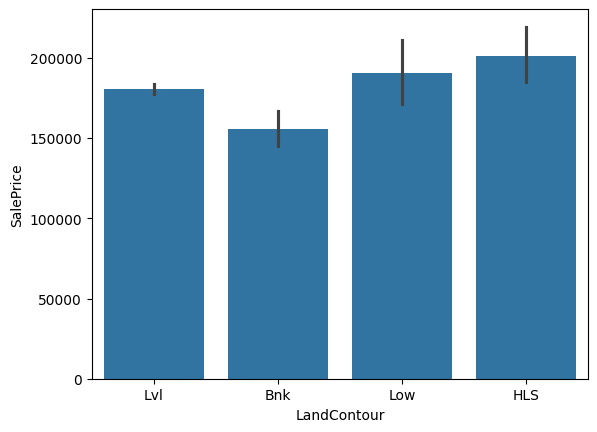

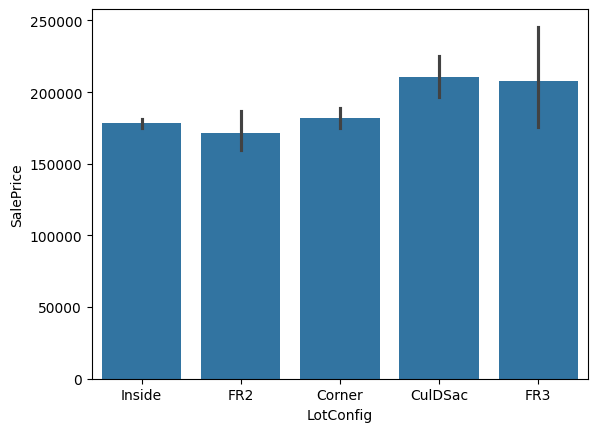

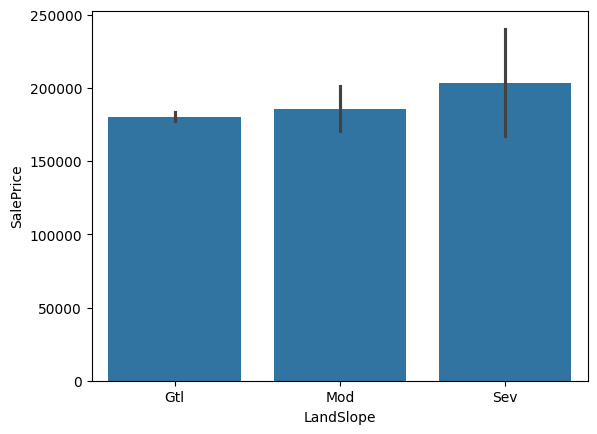

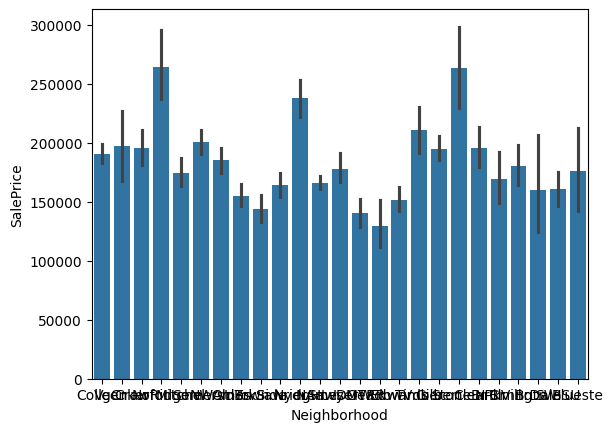

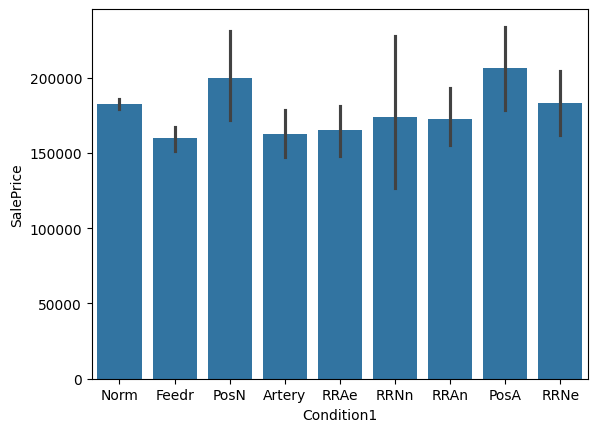

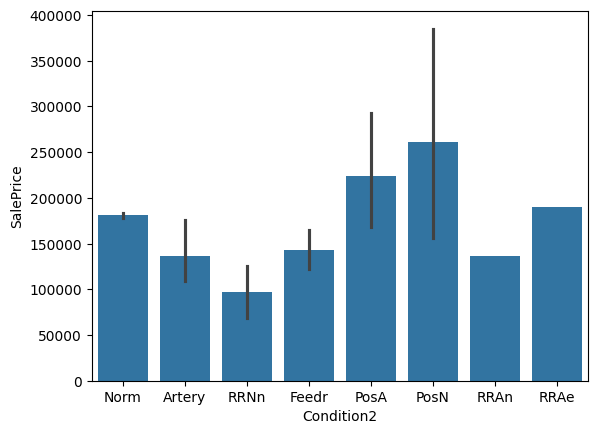

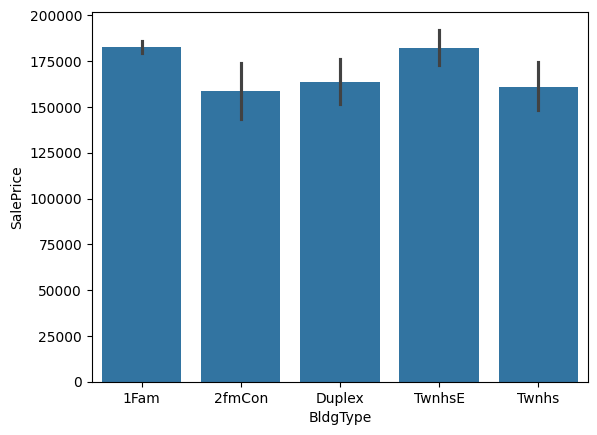

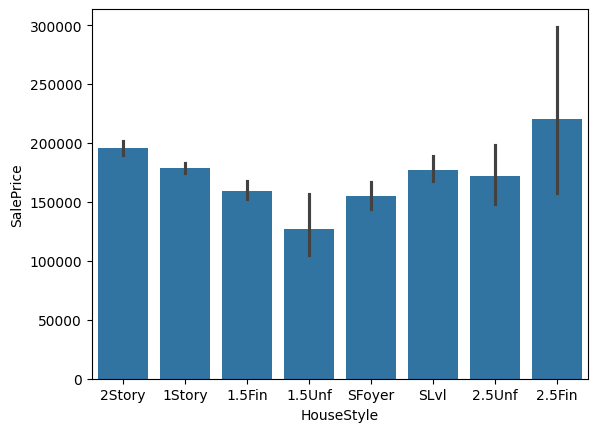

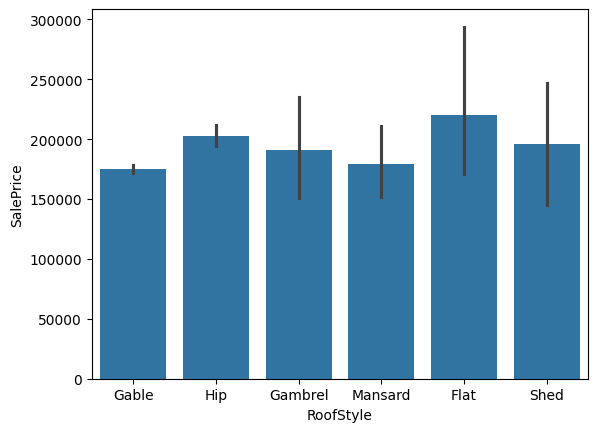

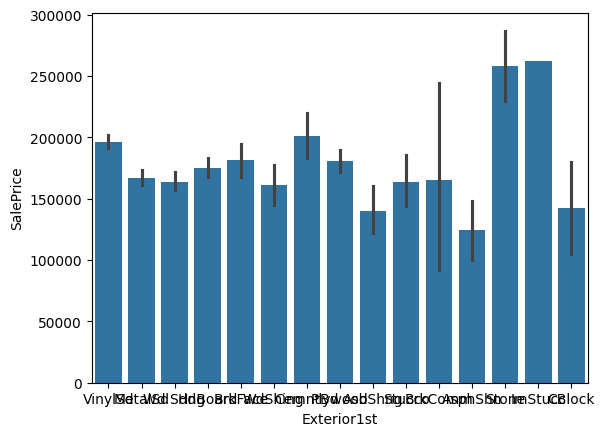

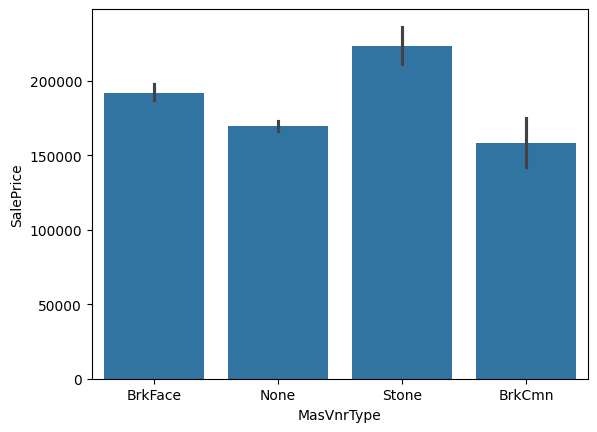

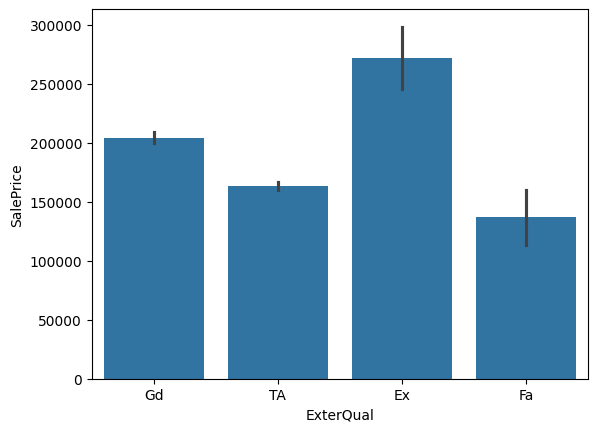

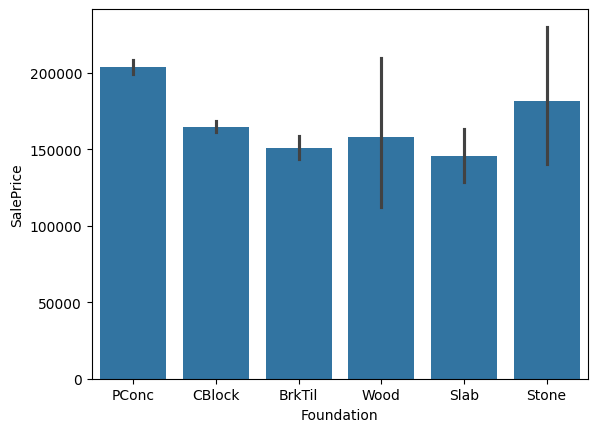

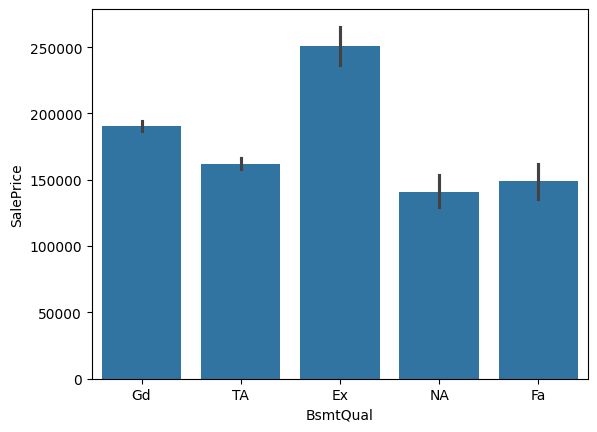

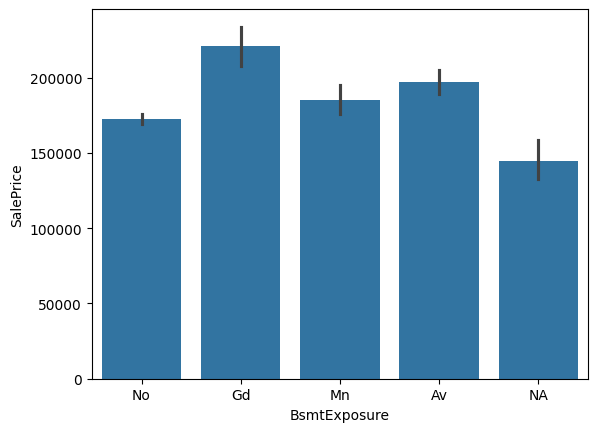

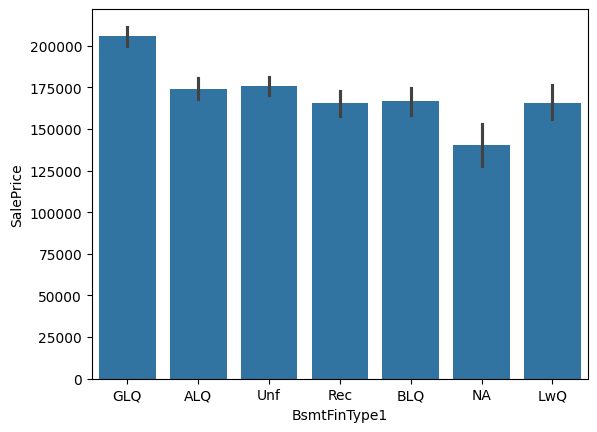

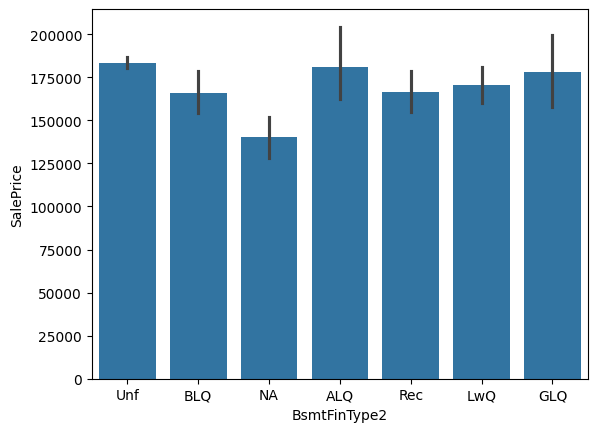

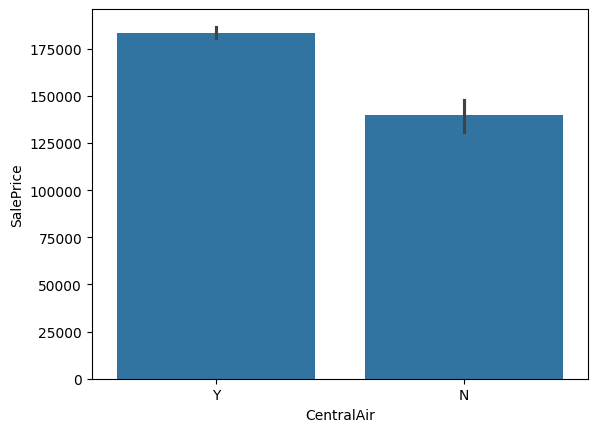

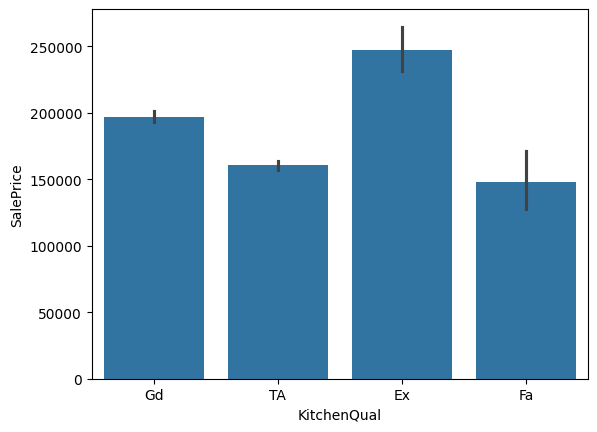

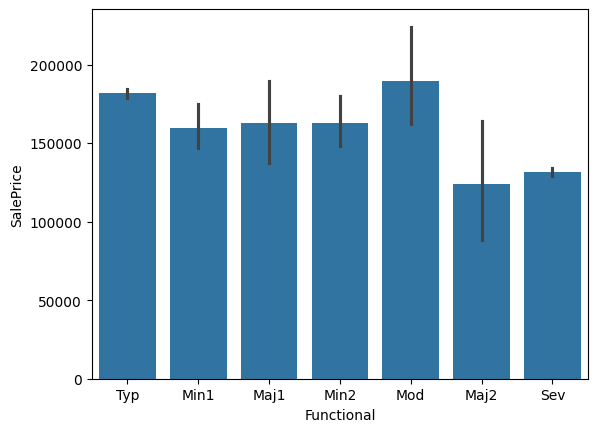

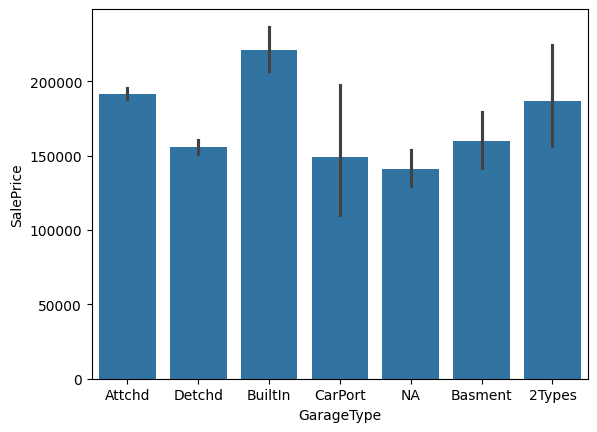

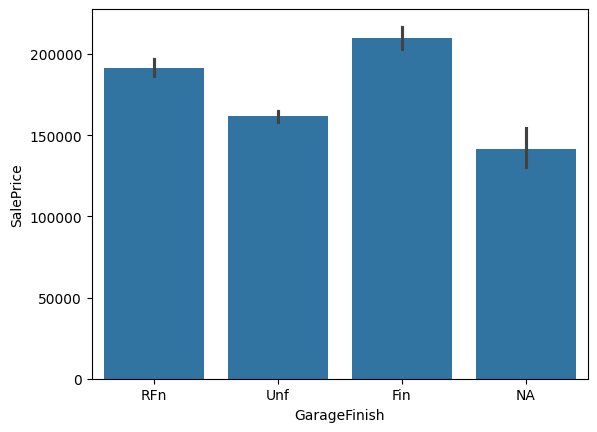

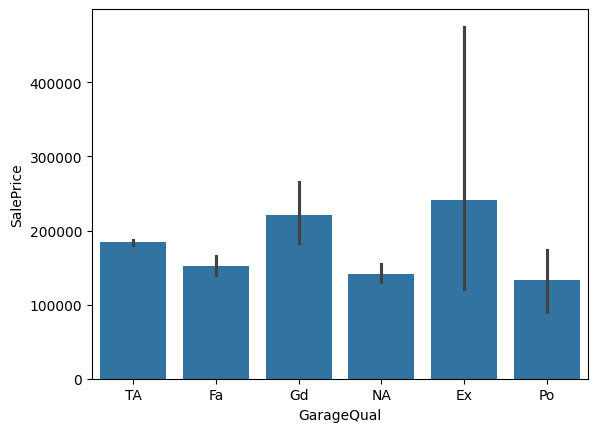

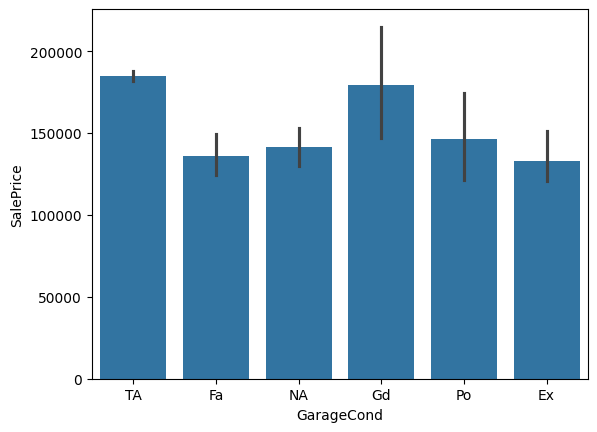

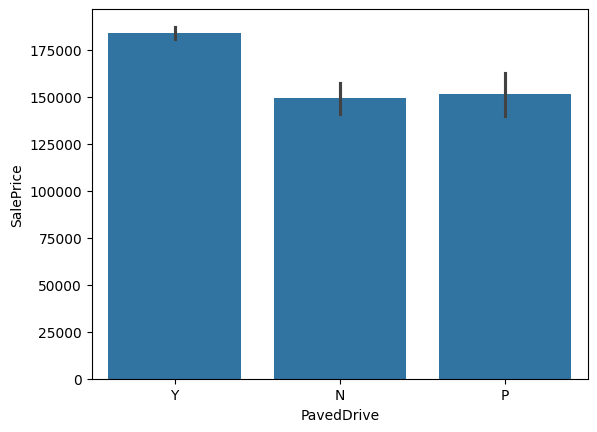

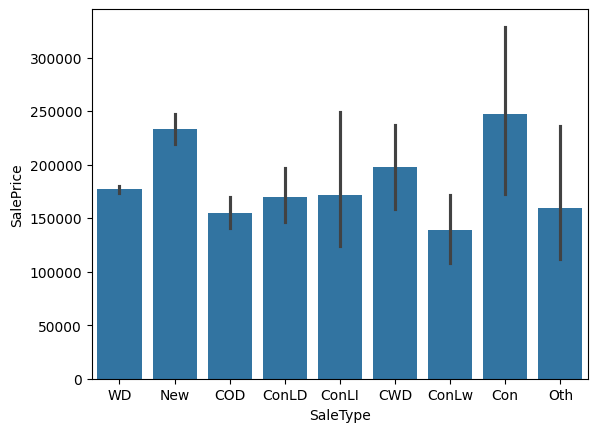

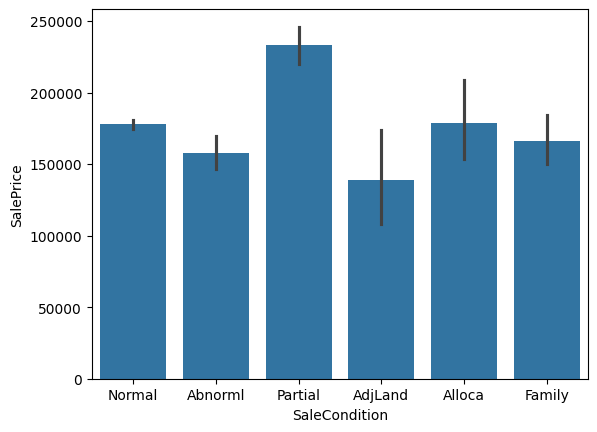

In [36]:
#Graphing categorical features to see if they have a significant impact on SalePrice
categorical = combined.select_dtypes(include = ['object'])
for i, col in enumerate(categorical):
    plt.figure(i)
    sns.barplot(x = combined[col], y = combined['SalePrice'])
    plt.show()

In [37]:
#Label Encoding
columns = ['LandSlope', 'CentralAir']
for col in columns:
    le = LabelEncoder()
    le.fit(list(combined[col].values))
    combined[col] = le.transform(list(combined[col].values))

combined.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,Unf,0.0,150.0,856.0,1,856,854,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,2,2008,WD,Normal,208500.0
1,RL,80.0,9600,Reg,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,1,1262,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,5,2007,WD,Normal,181500.0
2,RL,68.0,11250,IR1,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1,920,866,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,9,2008,WD,Normal,223500.0
3,RL,60.0,9550,IR1,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,Unf,0.0,540.0,756.0,1,961,756,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,0,2,2006,WD,Abnorml,140000.0
4,RL,84.0,14260,IR1,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1,1145,1053,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,12,2008,WD,Normal,250000.0


Another interesting feature I viewed in those graphs are the neighbourhoods. Let's take a closer look.

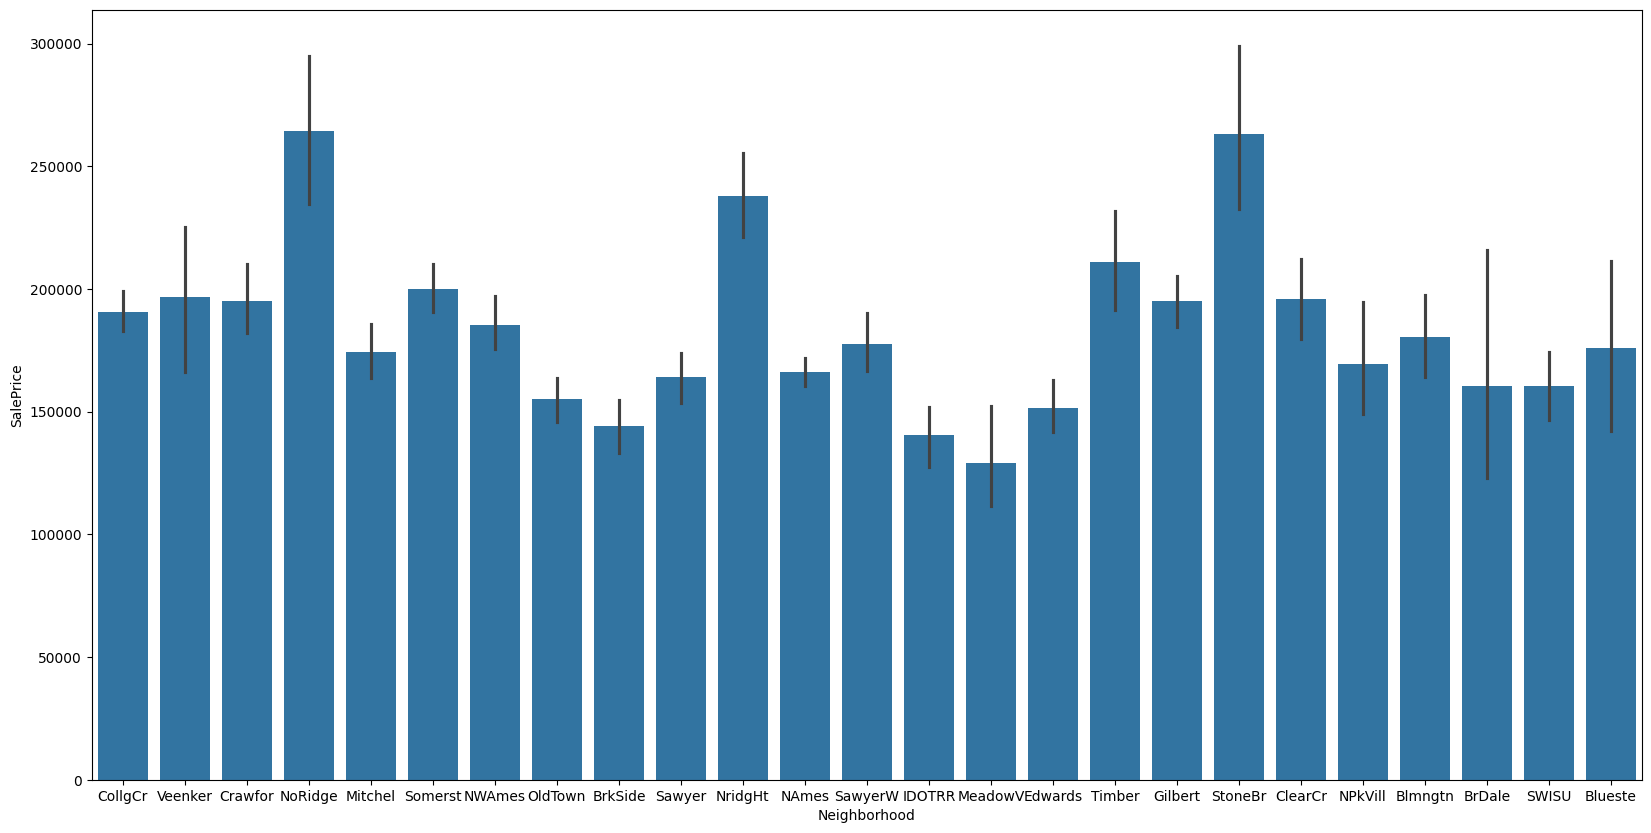

In [38]:
plt.figure(figsize = (20, 10))
sns.barplot(x = combined['Neighborhood'], y = combined['SalePrice'])
plt.show()

In [39]:
combined[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values(by = 'SalePrice')

,SalePrice
Neighborhood,
MeadowV,98576.470588
IDOTRR,101935.555556
BrDale,104493.750000
BrkSide,124834.051724
Edwards,127318.571429
OldTown,128225.300885
Sawyer,136793.135135
Blueste,137500.000000
SWISU,142591.360000


We can see three clear above the rest, a middle area, then a few on the outskirts. Let's change this feature into 3 categories using IQR. The first category is anything below the 25th percentile, the second is anything between the 25th and 75th percentile, and the third is anything above the 75th percentile.

In [40]:
'''dic = {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 1, 'NoRidge': 2, 'Mitchel': 1, 
       'Somerst': 2, 'NWAmes': 1, 'OldTown': 0, 'BrkSide': 0, 'Sawyer': 1, 
       'NridgHt': 2, 'NAmes': 1, 'SawyerW': 1, 'IDOTRR': 0, 'MeadowV': 0, 
       'Edwards': 0, 'Timber': 2, 'Gilbert': 1, 'StoneBr': 2, 'ClearCr': 1, 
       'BrDale': 0, 'Blmngtn': 1, 'SWISU': 1, 'Blueste': 1, 'NPkVill': 1}
combined['Neighborhood'] = combined['Neighborhood'].map(dic)'''
#Removing this feature as it negatively impacts the model


"dic = {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 1, 'NoRidge': 2, 'Mitchel': 1, \n       'Somerst': 2, 'NWAmes': 1, 'OldTown': 0, 'BrkSide': 0, 'Sawyer': 1, \n       'NridgHt': 2, 'NAmes': 1, 'SawyerW': 1, 'IDOTRR': 0, 'MeadowV': 0, \n       'Edwards': 0, 'Timber': 2, 'Gilbert': 1, 'StoneBr': 2, 'ClearCr': 1, \n       'BrDale': 0, 'Blmngtn': 1, 'SWISU': 1, 'Blueste': 1, 'NPkVill': 1}\ncombined['Neighborhood'] = combined['Neighborhood'].map(dic)"

Now let's convert some numerical features to categorical features: YrSold and MoSold

In [41]:
combined['YrSold'] = combined['YrSold'].astype(str)
combined['MoSold'] = combined['MoSold'].astype(str)

Now let's take a look at SalePrice

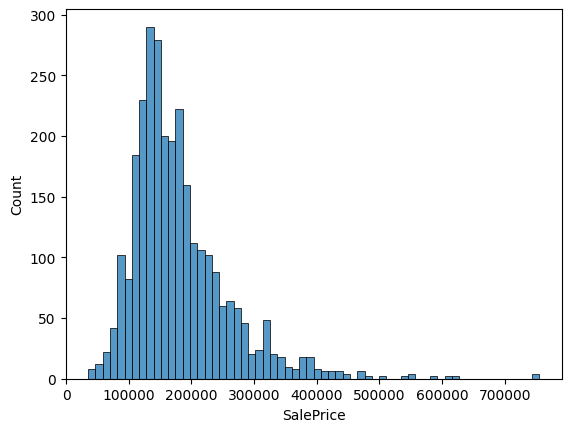

In [42]:
sns.histplot(x = combined['SalePrice'])
plt.show()

Since our data is skewed to the right, let's take the log of SalePrice

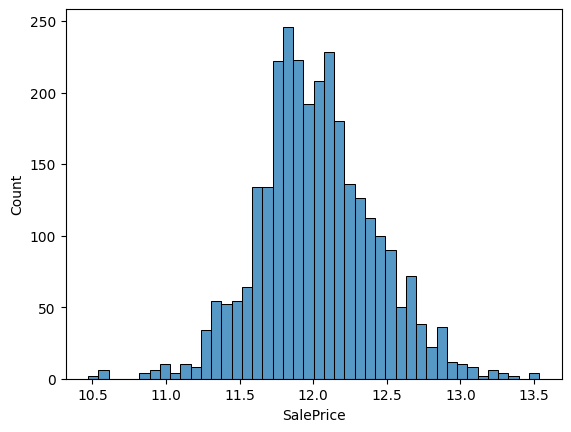

In [43]:
combined['SalePrice'] = np.log1p(combined['SalePrice'])
sns.histplot(x = combined['SalePrice'])
plt.show()

Now let's create a feature for total square footage, since this is something people will look for when buying a house

In [44]:
combined['TotalSQFT'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']

Now, let's transform numerical data that may be skewed.

In [45]:
numerical_cols = combined.select_dtypes(include = ['int64', 'float64'])
print(numerical_cols.skew())

LotFrontage      0.768145
LotArea         13.139346
LandSlope        4.993303
OverallQual      0.192003
OverallCond      0.568589
YearBuilt       -0.599121
YearRemodAdd    -0.449052
MasVnrArea       2.478045
BsmtFinSF1       0.984009
BsmtFinSF2       4.153403
BsmtUnfSF        0.915714
TotalBsmtSF      0.609974
CentralAir      -3.466624
1stFlrSF         1.230153
2ndFlrSF         0.861167
GrLivArea        1.068005
BsmtFullBath     0.624500
BsmtHalfBath     3.928022
FullBath         0.164188
HalfBath         0.695897
BedroomAbvGr     0.327987
KitchenAbvGr     4.298501
TotRmsAbvGrd     0.751945
Fireplaces       0.727498
GarageYrBlt     -3.917212
GarageCars      -0.217138
GarageArea       0.219720
WoodDeckSF       1.846020
OpenPorchSF      2.477913
ScreenPorch      3.956274
SalePrice        0.157875
TotalSQFT        0.984093
dtype: float64


In [46]:
right_skewed_cols = numerical_cols.columns[numerical_cols.skew() > 0.75]
left_skewed_cols = numerical_cols.columns[numerical_cols.skew() < -0.75]

In [47]:
for col in right_skewed_cols:
    combined[col], _ = stats.boxcox(combined[col] + 1e-5)

In [48]:
pt = PowerTransformer(method='yeo-johnson')
combined[left_skewed_cols] = pt.fit_transform(combined[left_skewed_cols])

Finally, let's one-hot encode the categorical features

In [49]:
combined = pd.get_dummies(combined)
combined.shape

(2912, 233)

## Prepare Data for Modeling

In [50]:
train = combined[:len(train)]
test = combined[len(train):]

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1162, 232), (1459, 232), (1162,), (1459,))

### 7-Fold Cross Validation

In [51]:
kf = KFold(n_splits=7, shuffle=True, random_state=13)

def evaluate_model(model, X, y):
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf))
    return scores

## Train

We will be testing on 4 models, Linear Regression, LightGBM, XGBoost, and Random Forests.

### Linear Regression

In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred_lr = lr_model.predict(X_val)
rmse_lr = evaluate_model(lr_model, X_val, y_val)
print('LR RMSE:', np.mean(rmse_lr))

LR RMSE: 1.2126973217823935


### LightGBM

In [54]:
param_grid_lgbm = {'n_estimators': [500], 'learning_rate': [0.05], 
                  'max_depth': [5, 10]}
lgbm = LGBMRegressor(random_state=13, verbosity=-1)

lgbm_model = GridSearchCV(lgbm, param_grid_lgbm, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
lgbm_model.fit(X_train, y_train)
best_lgbm = lgbm_model.best_estimator_
print(f"Best Parameters: {lgbm_model.best_params_}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}


In [55]:
rmse_lgbm_train = evaluate_model(best_lgbm, X_train, y_train)
print('LGBM RMSE TRAIN:', np.mean(rmse_lgbm_train))

rmse_lgbm_val = evaluate_model(best_lgbm, X_val, y_val)
print('LGBM RMSE VAL:', np.mean(rmse_lgbm_val))


LGBM RMSE TRAIN: 0.12495440750751148
LGBM RMSE VAL: 0.1503667294624613


### XGBoost 

In [56]:
param_grid_xgb = {'n_estimators': [500], 'learning_rate': [0.05], 
                  'max_depth': [5, 10]}
xgb = XGBRegressor(random_state=13)

xgb_model = GridSearchCV(xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
xgb_model.fit(X_train, y_train, verbose=False)
best_xgb = xgb_model.best_estimator_
print(f"Best Parameters: {xgb_model.best_params_}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}


In [57]:
rmse_xgb_train = evaluate_model(best_xgb, X_train, y_train)
print('XGB RMSE TRAIN:', np.mean(rmse_xgb_train))

rmse_xgb_val = evaluate_model(best_xgb, X_val, y_val)
print('XGB RMSE VAL:', np.mean(rmse_xgb_val))


XGB RMSE TRAIN: 0.12419767767241495
XGB RMSE VAL: 0.15155922883241435


### Gradient Boosting

In [58]:
param_grid_gbr = {'n_estimators': [500], 'learning_rate': [0.05], 
                  'max_depth': [5, 10]}
gbr = GradientBoostingRegressor(random_state=13)

gbr_model = GridSearchCV(gbr, param_grid_gbr, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gbr_model.fit(X_train, y_train)
best_gbr = gbr_model.best_estimator_
print(f"Best Parameters: {gbr_model.best_params_}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}


In [59]:
rmse_gbr_train = evaluate_model(best_gbr, X_train, y_train)
print('GBR RMSE TRAIN:', np.mean(rmse_gbr_train))

rmse_gbr_val = evaluate_model(best_gbr, X_val, y_val)
print('GBR RMSE VAL:', np.mean(rmse_gbr_val))

GBR RMSE TRAIN: 0.12485128054258578
GBR RMSE VAL: 0.15711031844850534


### Random Forests

In [60]:
param_grid_rf = {'n_estimators': [100, 500, 1000], 'max_depth': [10, 20]}
rf = RandomForestRegressor(random_state=13)

rf_model = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_model.fit(X_train, y_train)
best_rf = rf_model.best_estimator_
print(f"Best Parameters: {rf_model.best_params_}")

Best Parameters: {'max_depth': 20, 'n_estimators': 1000}


In [61]:
rmse_rf_train = evaluate_model(best_rf, X_train, y_train)
print('RF RMSE TRAIN:', np.mean(rmse_rf_train))

rmse_rf_val = evaluate_model(best_rf, X_val, y_val)
print('RF RMSE VAL:', np.mean(rmse_rf_val))

RF RMSE TRAIN: 0.13724522537978914
RF RMSE VAL: 0.15353945552791268


## Stacking

In [62]:
stack = StackingCVRegressor(
    regressors=[best_lgbm, best_xgb, best_gbr, best_rf],
    meta_regressor=Ridge(alpha=1.0, random_state=13),
    cv=kf,
    store_train_meta_features=True
)

In [63]:
stack.fit(X_train.values, y_train.values)
rmse_stack = evaluate_model(stack, X_val.values, y_val.values)
print('Stack RMSE:', np.mean(rmse_stack))

Stack RMSE: 0.1442752187787099


### Weighted Average

In [64]:
lgbm_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
stack_preds = stack.predict(X_test.values)

final_preds = (0.60 * stack_preds) + (0.25 * lgbm_preds) + (0.15 * xgb_preds)

## Evaluate

In [65]:
#y_pred = stack.predict(X_test.values)
predictions = np.expm1(final_preds)
pred_df = pd.DataFrame(predictions, columns = ['SalePrice'])
pred_df.index.name = 'Id'
pred_df.index += 1461
pred_df.head()

,SalePrice
Id,
1461,122663.403256
1462,168224.131626
1463,188238.535379
1464,195344.552569
1465,188323.689013


In [66]:
pred_df.to_csv('submission.csv', header=True)